In [57]:
import json
import numpy as np
from collections import namedtuple
import context
from numlabs.lab4.lab4_functions import initinter41

In [58]:
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.1,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time)
ye=[]
ym=[]
yh=[]
y=coeff.yinitial
ye.append(y)
ye=ye[0]
ym.append(y)
ym=ym[0]
yh.append(y)
yh=yh[0]
#
def fun(coeff, y, time):
    f= coeff.c1*y + coeff.c2*time + coeff.c3
    return f
#
def euler(coeff,y,theTime):
    ynew=y + coeff.dt*fun(coeff,y,theTime)
    return ynew
#
def midpoint(coeff, y,theTime):
    midy=y + 0.5 * coeff.dt * fun(coeff,y,theTime)
    y = y + coeff.dt*fun(coeff,midy,theTime+0.5*coeff.dt)
    return y
#
def heun(coeff, y, theTime): 
    k1 = coeff.dt * fun(coeff,y, theTime)
    k2 = coeff.dt * fun(coeff,y + ((2.0/3.0) * k1), theTime + coeff.dt*(2.0/3.0))
    y_heun = y + (1.0/4.0) * (k1 + ((3.0/4.0) * k2))
    return y_heun
#
ys_euler=np.empty([nsteps],np.float64)
ys_midpoint=np.empty([nsteps],np.float64)
ys_heun=np.empty([nsteps],np.float64)
#
for i in range(len(time)):
    y=midpoint(coeff,ym, time[i])#fun(coeff,y,time))
    ys_midpoint[i]=y # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u
    ynew=euler(coeff,ye,fun(coeff,ye,time[i]))
    ys_euler[i]=ynew # we're only saving the first dimension, which is y, not the second dimension, dy/dt = u
    y_heun=heun(coeff,yh, time[i])
    ys_heun[i]=y_heun
   

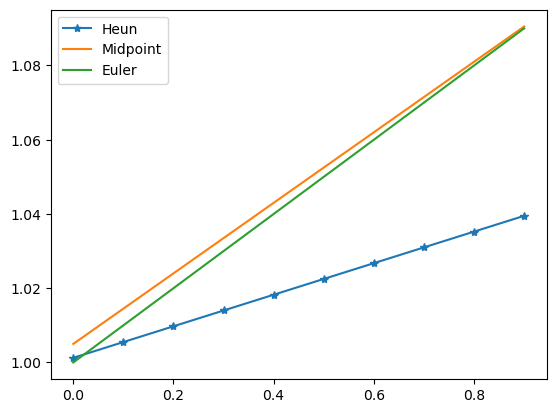

In [59]:
import matplotlib.pyplot as plt
plt.plot(time,ys_heun,'-*',label='Heun')
plt.plot(time,ys_midpoint,label='Midpoint')
plt.plot(time,ys_euler,label='Euler')
plt.legend()